In [2]:
import pandas as pd

In [8]:
diabetes_data = pd.read_csv('diabetes.csv')

In [9]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
num_rows, num_columns = diabetes_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 768
Number of columns: 9


In [16]:
missing_values = diabetes_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


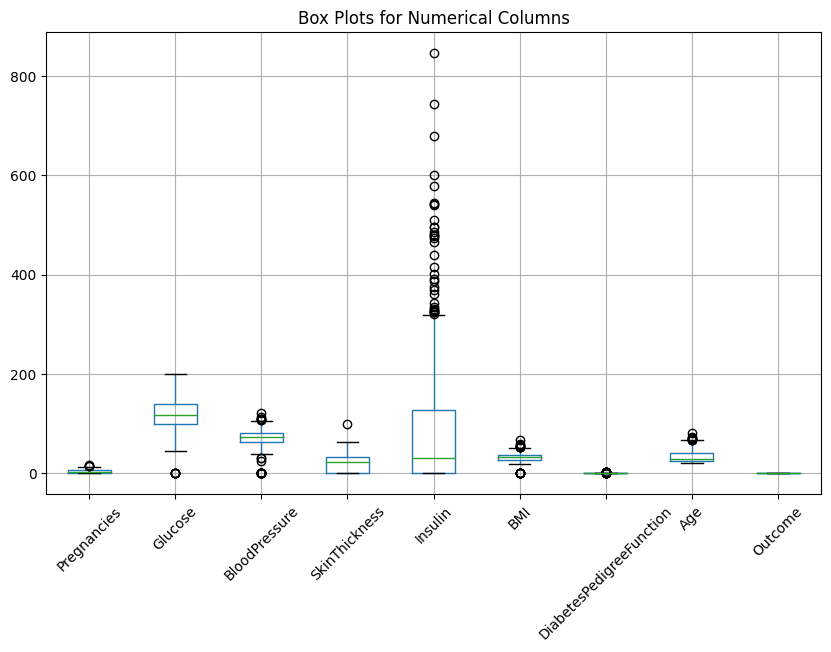

In [18]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
diabetes_data.boxplot(figsize=(10, 6))
plt.title("Box Plots for Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [20]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = pd.DataFrame(stats.zscore(diabetes_data.select_dtypes(include='number')), columns=diabetes_data.select_dtypes(include='number').columns)

# Identify rows with any Z-score greater than 3 or less than -3 (adjust threshold as needed)
outliers = diabetes_data[z_scores.abs() > 3].dropna(how='all')

print("Outliers:")
print(outliers)


Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
4            NaN      NaN            NaN            NaN      NaN  NaN   
7            NaN      NaN            0.0            NaN      NaN  NaN   
8            NaN      NaN            NaN            NaN    543.0  NaN   
9            NaN      NaN            NaN            NaN      NaN  0.0   
13           NaN      NaN            NaN            NaN    846.0  NaN   
..           ...      ...            ...            ...      ...  ...   
695          NaN      NaN            NaN            NaN    480.0  NaN   
697          NaN      NaN            0.0            NaN      NaN  NaN   
703          NaN      NaN            0.0            NaN      NaN  NaN   
706          NaN      NaN            0.0            NaN      NaN  0.0   
753          NaN      NaN            NaN            NaN    510.0  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288  NaN      NaN  
7                    

In [21]:
# Calculate the IQR for numerical columns
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

# Identify rows with any value outside the IQR range
outliers = diabetes_data[((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers:")
print(outliers)


Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7        

In [23]:
import numpy as np
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [24]:
missing_values = diabetes_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [25]:
# Check for missing values in the entire DataFrame
missing_values = diabetes_data.isnull()

# Filter the DataFrame to show rows with any missing values
rows_with_missing_values = diabetes_data[missing_values.any(axis=1)]

print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50     

In [26]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [27]:
print(diabetes_data.Outcome.unique())

[1 0]


In [28]:
diabetes_data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            74.0     52.0           10.0           36.0     27.8  0.269                     22   0          1
4            117.0    64.0           27.0           120.0    33.2  0.230                     24   0          1
             111.0    72.0           47.0           207.0    37.1  1.390                     56   1          1
             110.0    76.0           20.0           100.0    28.4  0.118                     27   0          1
             109.0    64.0           44.0           99.0     34.8  0.905                     26   1          1
                                                                                                            ..
1            131.0    64.0           14.0           415.0    23.7  0.389                     21   0          1
             130.0    70.0           13.0           105.0    25.9  0.472                     22   0          1
      